# http://tau-data.id/umi/

<center><img alt="" src="images/0_Cover.jpg"/></center> 

## <center><font color="blue">Modul 05: Pendahuluan Machine Learning 01</font></center>
<b><center>(C) Taufik Sutanto - 2019</center>
<center>tau-data Indonesia ~ https://tau-data.id ~ taufik@tau-data.id</center>

## <center><font color="blue">Pendahuluan Machine Learning 1: Unsupervised Learning & Regresi</font></center>
<img alt="" src="images/PDS_logo.jpg" />

## <font color="green">Hari ke-3 (Rabu, 29 Jan 2020)</font>

**Pendahuluan Data Science II**
* 09:00 – 11:00 Unsupervised Learning & Regresi
* 11:00 – 12:00	Latihan
* 13:00 – 15:00	Supervised Learning - Klasifikasi
* 15:00 – 16.00	Latihan Klasifikasi

Studi Kasus: **Human Resources Analytics**

## Outline:

* Pendahuluan Clustering
* Centroid-Based Clustering: k-Means, k-Means++, Minibatch k-means
* Evaluasi Centroid-based clusetering: MSE dan Silhouette Coefficient
* Optimal Clusters?
* Visualisasi dan Interpretasi Centroid Based Clustering
* Density Based Clustering dan Multivariate outlier Detection (DBSCAN)
* Pendahuluan Hierarchical Clustering

* Hierarchical Links

In [ ]:
!wget https://raw.githubusercontent.com/taufikedys/UMI/master/tau_unsup.py
!pip install umap-learn
!mkdir data
!wget -P data/ https://raw.githubusercontent.com/taufikedys/UMI/master/data/Mall_Customers.csv
!wget -P data/ https://raw.githubusercontent.com/taufikedys/UMI/master/data/iklan.csv

In [1]:
# Importing Modules untuk Notebook ini
import warnings; warnings.simplefilter('ignore')
import time, umap, numpy as np, matplotlib.pyplot as plt, pandas as pd, seaborn as sns
import tau_unsup as tau, scipy.stats as stats
import scipy, itertools
from matplotlib.colors import ListedColormap
from sklearn import cluster, datasets
from tqdm import tqdm_notebook as tqdm
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice
from sklearn.metrics import silhouette_score as siluet
from sklearn.metrics.cluster import homogeneity_score as purity
from sklearn.metrics import normalized_mutual_info_score as NMI
from sklearn.metrics import confusion_matrix, classification_report
from scipy import stats
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
plt.style.use('bmh'); sns.set();sns.set(style="ticks", color_codes=True)
random_state = 170

<p><img alt="" src="images/clustering_Quotes.png" style="width: 800px; height: 118px;" /></p>


# Clustering?

<p><img alt="" src="images/5_what_is_clustering.png" style="height:457px; width:864px" /></p>

## Definition

Clustering is as a process of finding group structures within data such that each instance within a group is similar to one another and dissimilar to instances in other groups [1]

[1]. Jain, A.K., Data clustering: 50 years beyond K-means. Pattern Recognition Letters, 2010. 31(8): p. 651-666.

## Applications

Clustering analysis applications can be divided into two broad categories, clustering for utility (e.g., data compression and indexing) and clustering for understanding data (e.g., finding latent structures or insights in the data) [2]. Methods developed in this subject (Data Mining) fall into the second category.

[2]. Pang-Ning, T., M. Steinbach, and V. Kumar, Introduction to data mining. Vol. 74. 2006, Boston, MA, USA: Addison-Wesley Longman Publishing Co., Inc.

## Realworld Clustering Applications

* Recommendation engines
* Market segmentation
* Social network analysis
* Search result grouping
* Medical imaging
* Image segmentation
* Anomaly detection

<p><img alt="" src="images/5_Clus-Clas.png" style="height:500px; width:766px" /></p>

<p><img alt="" src="images/5_types_of_clustering.png" style="height:500px; width:719px" /></p>

# Tantangan Clustering

* Computational Complexity
* Evaluation
* Interpretation
* Heavily depends on domain knowledge

<p><img alt="" src="images/iris_flower.png" /></p>

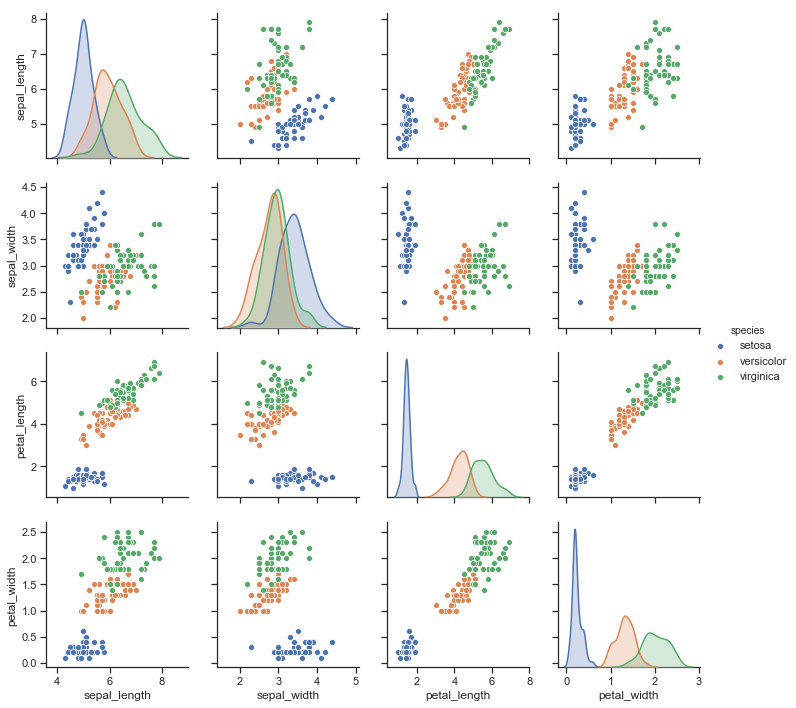

In [3]:
iris = sns.load_dataset("iris")
g = sns.pairplot(iris, hue="species")

In [4]:
type(iris)

pandas.core.frame.DataFrame

In [5]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
X = iris[['sepal_length','sepal_width','petal_length','petal_width']].to_numpy()
print(X.shape, type(X))

(150, 4) <class 'numpy.ndarray'>


In [7]:
from sklearn.preprocessing import LabelEncoder

iris['species_encoded'] = LabelEncoder().fit_transform(iris['species'])
Y = iris['species_encoded'].to_numpy()
iris.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species,species_encoded
114,5.8,2.8,5.1,2.4,virginica,2
62,6.0,2.2,4.0,1.0,versicolor,1
33,5.5,4.2,1.4,0.2,setosa,0
107,7.3,2.9,6.3,1.8,virginica,2
7,5.0,3.4,1.5,0.2,setosa,0
100,6.3,3.3,6.0,2.5,virginica,2
40,5.0,3.5,1.3,0.3,setosa,0
86,6.7,3.1,4.7,1.5,versicolor,1
76,6.8,2.8,4.8,1.4,versicolor,1
71,6.1,2.8,4.0,1.3,versicolor,1


<h2>k-Means</h2>

<p><img alt="" src="images/5_Kmeans_animation.gif" style="height:300px; width:300px" /></p>


<p><img alt="" src="images/5_kmeans_Algorithm.png" style="height:229px; width:430px" /></p>

## How it works

* Numerically
* Visually: https://www.learndatasci.com/tutorials/k-means-clustering-algorithms-python-intro/ 

<ul>
	<li>
	<h3>Apakah pengaruh menggunakan centroid dan algoritma ini terhadap hasil cluster?</h3>
	</li>
	<li>
	<h3>k-Means tidak Robust terhadap outlier, Why? ==&gt; lalu apa yang sebaiknya dilakukan?</h3>
	</li>
</ul>

In [53]:
np.random.seed(seed=3)
np.random.rand()

0.5507979025745755

In [54]:
# k-means: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

k = 3
km = cluster.KMeans(n_clusters=k, init='random', max_iter=300, tol=0.0001, n_jobs=-1, random_state = 33)
km.fit(X)
'Done'

'Done'

In [64]:
# Hasil clusteringnya
C_km = km.predict(X)
C_km
# Apa beda label ini dengan klasifikasi ("labels")?

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0])

In [67]:
i = 99
print(X[i,:])
print('Masuk cluster = ', C_km[i])

[5.7 2.8 4.1 1.3]
Masuk cluster =  0


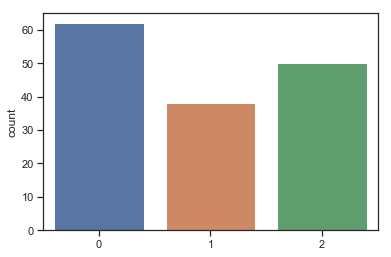

In [56]:
plot = sns.countplot(C_km)

c:\winpython_368\python-3.6.8.amd64\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


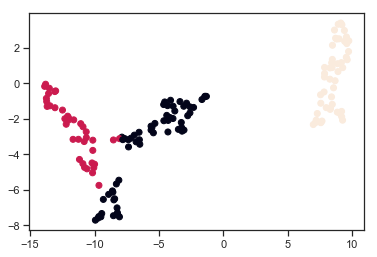

In [63]:
X2D = umap.UMAP(n_neighbors=5, min_dist=0.3).fit_transform(X)
fig, ax = plt.subplots()
ax.scatter(X2D[:,0], X2D[:,1], c=C_km)
plt.show()

<h3 id="k-Means++">k-Means++</h3>

<p>Original <em>k-means</em> memulai algoritmanya dengan mengacak centroid awal dan k-means tidak &quot;robust&quot; terhadap centroid awal ini (apa artinya?).</p>

<p>&nbsp;</p>

<p><strong>k-Means akan menghasilkan hasil yang berbeda-beda jika di-run beberapa kali!....</strong></p>

<p>k-Means++ &quot;mengatasi&quot; hal ini:</p>

<p>inisialisasi centroid tidak random, tapi dengan menghitung probabilitas terbaik bagi centroid awal.</p>

<p>Keuntungan selain lebih robust, biasanya iterasi yang dibutuhkan jauh lebih sedikit ketimbang k-means++</p>

<p>Reference :&nbsp;<a href="http://ilpubs.stanford.edu:8090/778/1/2006-13.pdf" target="_blank">http://ilpubs.stanford.edu:8090/778/1/2006-13.pdf</a>&nbsp;</p>


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

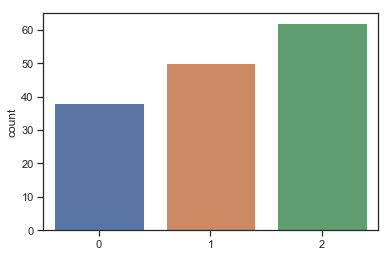

In [68]:
# k-means++ clustering http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
kmPP = cluster.KMeans(n_clusters=k, init='k-means++', max_iter=300, tol=0.0001, n_jobs=-1, random_state = random_state)
kmPP.fit(X)
C_kmpp = kmPP.predict(X)

plot = sns.countplot(C_kmpp)
C_kmpp[:10]

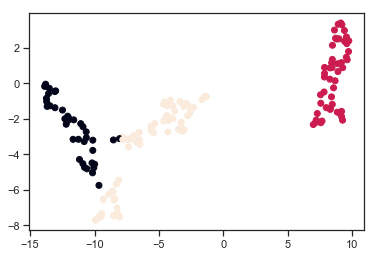

In [69]:
fig, ax = plt.subplots()
plot = ax.scatter(X2D[:,0], X2D[:,1], c=C_kmpp)

<h3>Mini-Batch k-Means:</h3>

<p><img alt="" src="images/5_minibatch.JPG" style="height:350px; width:458px" /></p>

<p>&nbsp;</p>

<p><strong>Referensi</strong>: *Sculley, D. (2010, April). Web-scale k-means clustering. In&nbsp;<em>Proceedings of the 19th international conference on World wide web</em>&nbsp;(pp. 1177-1178). ACM.</p>

<p>* Google</p>


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

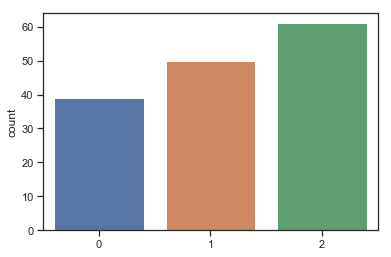

In [70]:
# MiniBatch k-Means 
# http://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html
# minibatch "tidak bisa parallel"!!!...
# parameter penting km = batch_size ... pada aplikasi sesungguhnya disarankan "minimal" 3xk
mbkm = cluster.MiniBatchKMeans(n_clusters=k, init='random', max_iter=300, batch_size=100, random_state = random_state) 
mbkm.fit(X)

C_mbkm = mbkm.predict(X)
sns.countplot(C_mbkm)
C_mbkm[:10]

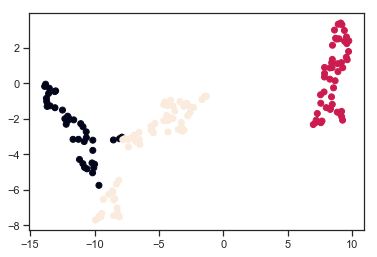

In [71]:
fig, ax = plt.subplots()
plot = ax.scatter(X2D[:,0], X2D[:,1], c=C_mbkm)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

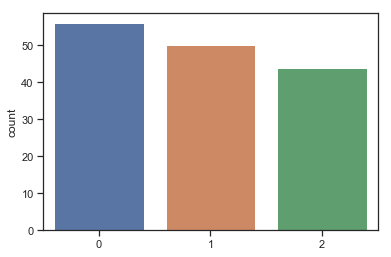

In [72]:
# MiniBatch k-Means++
mbkmPP = cluster.MiniBatchKMeans(n_clusters=k, init='k-means++', max_iter=300, tol=0.0001, random_state = random_state) 
mbkmPP.fit(X)
C_mbkmPP = mbkmPP.predict(X)
plot = sns.countplot(C_mbkmPP)
C_mbkmPP[:10]

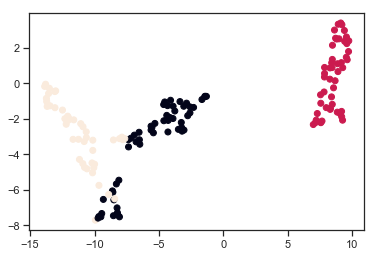

In [73]:
fig, ax = plt.subplots()
plot = ax.scatter(X2D[:,0], X2D[:,1], c=C_mbkmPP)


## k_means VS MiniBatch k-Means?

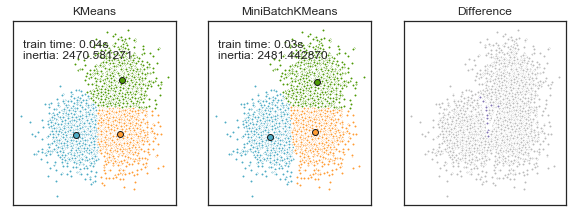

In [74]:
tau.km_vs_mbkm()

## Evaluasi dan interpretasi k-Means

<h2 id="Silhouette-Coefficient">Silhouette Coefficient</h2>

<img alt="" src="images/silhouette.png" style="width: 800px; height: 391px;" />

* Apa makna intuitifnya?

In [75]:
#Evaluasi : Internal . Contoh Silouette Coefficient ==> warning hanya cocok untuk k-means (centroid-based clustering)
Hasil_Clustering = [C_km, C_kmpp, C_mbkm, C_mbkmPP]
for res in Hasil_Clustering:
    print(siluet(X,res), end=', ')
# Bagaimana cara kerja dan interpretasinya?

0.5528190123564102, 0.5528190123564102, 0.5511916046195927, 0.5390671049271683, 

<p><strong>Evaluasi Clustering: Internal VS External</strong></p>

<p><img alt="" src="images/5_Clustering_evaluation.jpg" style="height:400px; width:533px" /></p>


In [76]:
# Bagaimana dengan evaluasi External?
# "C" adalah ground truth/golden standard
for res in Hasil_Clustering:
    print(purity(Y,res), end=', ')

0.7514854021988338, 0.7514854021988338, 0.736419288125285, 0.7371151150183064, 

## Optimal Number of Clusters? - Elbow Method

Text(0.5, 1.0, 'Elbow curve')

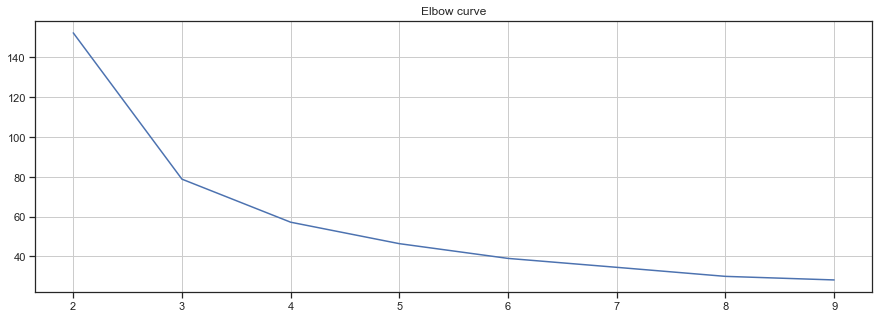

In [77]:
distorsions, k1, kN = [], 2, 10
for k in range(k1, kN):
    kmeans = cluster.KMeans(n_clusters=k).fit(X)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(k1, kN), distorsions); plt.grid(True)
plt.title('Elbow curve')

## Optimal Number of Cluster based on Silhouette Score

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.5745566973301872
For n_clusters = 6 The average silhouette_score is : 0.43983666423501233


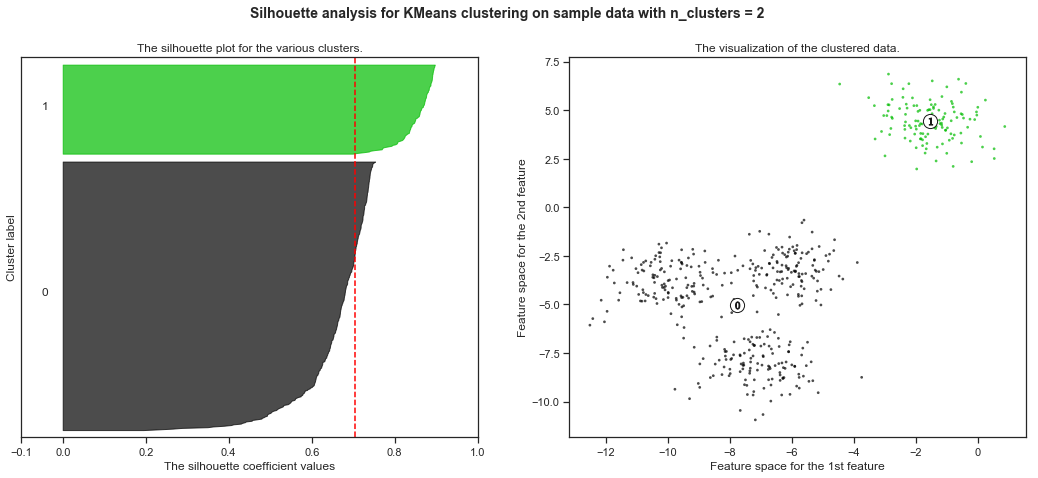

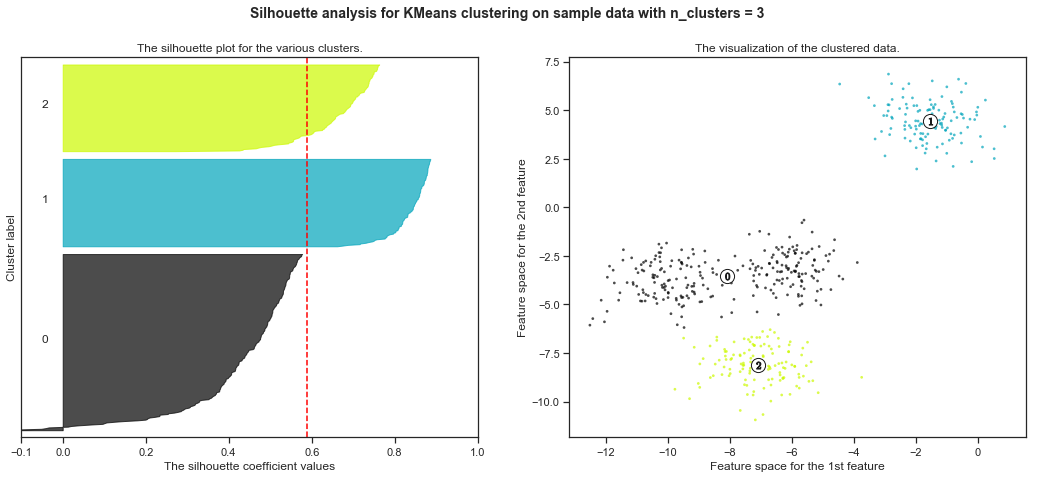

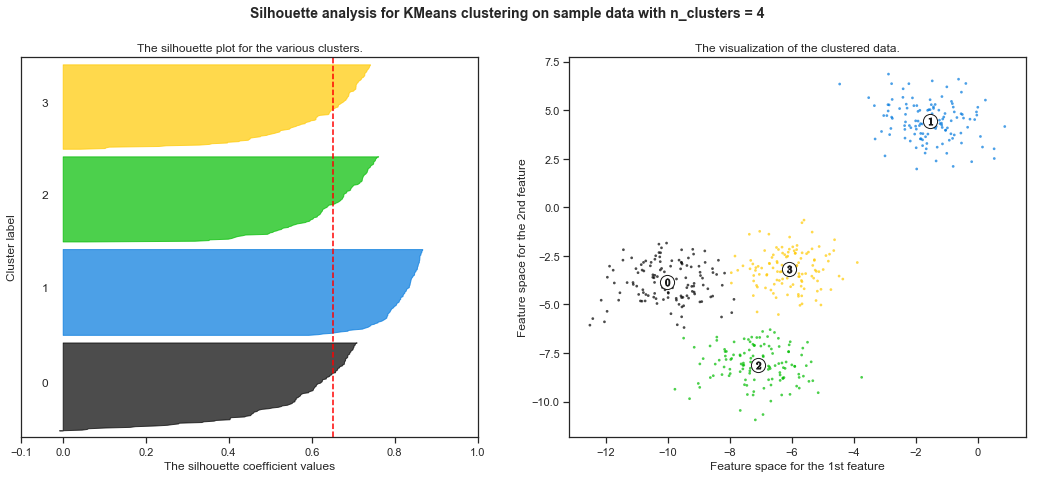

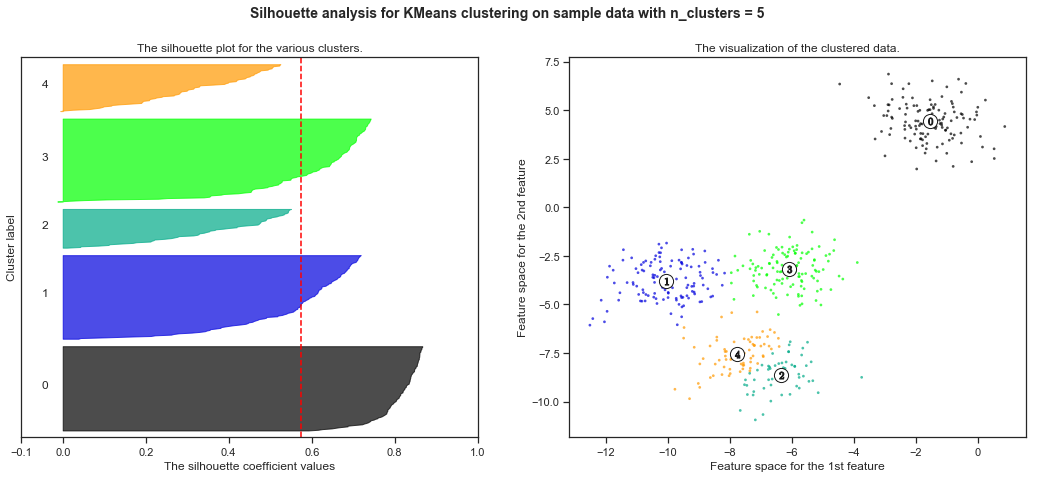

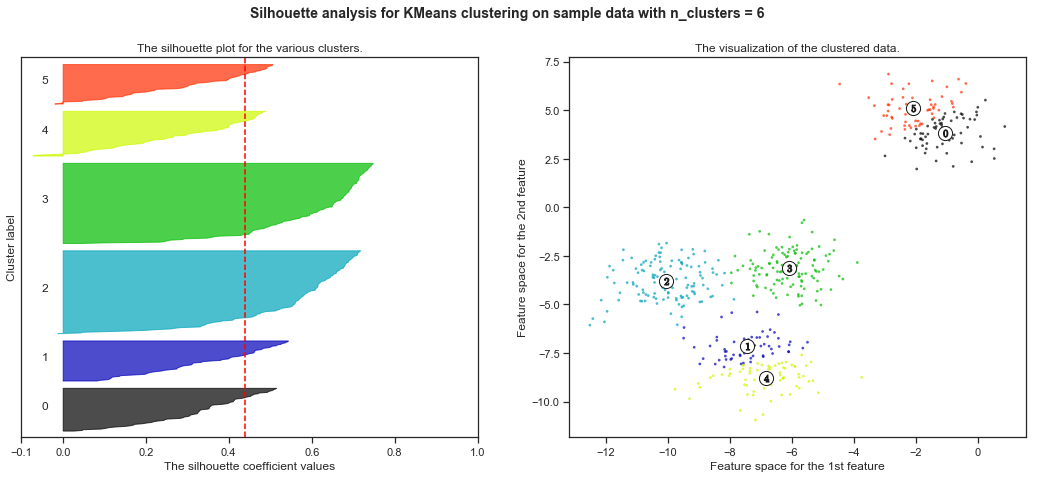

In [78]:
tau.sil_based_optimal_km()

# Interpretasi

In [79]:
# Evaluasi sebenarnya tidak terlalu penting di Unsupervised learning.
# inilah yang membedakan "clustering" dan "clustering Analysis"
# yang lebih penting adalah interpretasi, tapi Bagaimana?
# contoh k-means
centroids = kmPP.cluster_centers_
centroids # perhatikan ada k centroids, karena ada k cluster
print(centroids[0].shape)
centroids

(4,)


array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

In [81]:
iris['kmpp'] = C_kmpp
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_encoded,kmpp
0,5.1,3.5,1.4,0.2,setosa,0,1
1,4.9,3.0,1.4,0.2,setosa,0,1
2,4.7,3.2,1.3,0.2,setosa,0,1
3,4.6,3.1,1.5,0.2,setosa,0,1
4,5.0,3.6,1.4,0.2,setosa,0,1


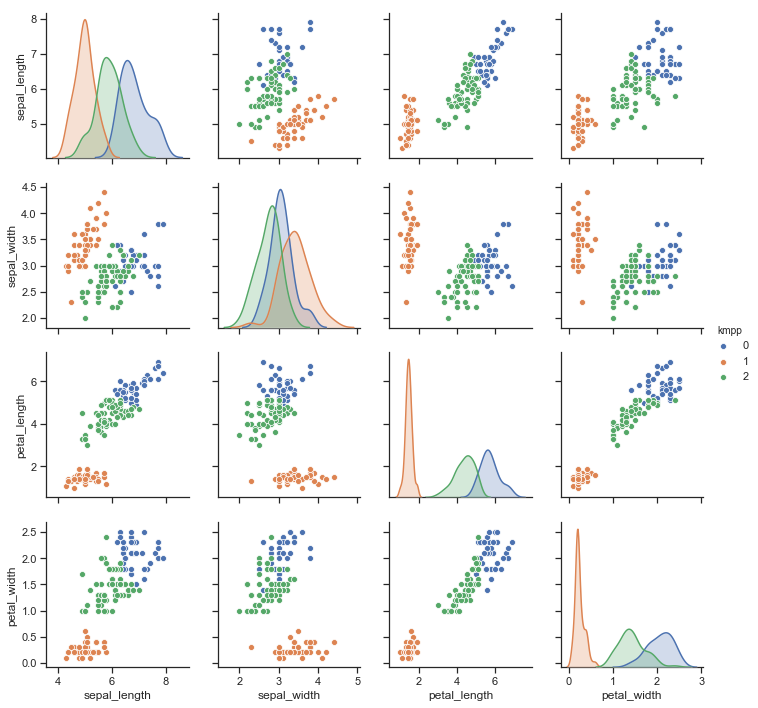

In [82]:
p = sns.pairplot(iris[['sepal_length','sepal_width','petal_length','petal_width','kmpp']], hue = 'kmpp', vars=['sepal_length','sepal_width','petal_length','petal_width'])

# Best/Optimal Clustering?

### Catatan Penting dalam mengevaluasi Clustering secara internal:

* Tidak ada clustering yang "benar"
* Yang terpenting adalah interpretability/Informasi yang didapatkan (non-trivial information)
* Internal metric tertentu hanya cocok untuk suatu algoritma tertentu juga, sehingga di Penelitian/Aplikasi di dunia professional jangan membandingkan 2 macam clustering dengan ukuran internal yang spesifik untuk metode clustering tertentu (misal Silhouette untuk k-Means).
* Kleinberg, J. M. (2003). An impossibility theorem for clustering. In Advances in neural information processing systems (pp. 463-470).
* Referensi 1: http://papers.nips.cc/paper/2340-an-impossibility-theorem-for-clustering.pdf
* Referensi 2: https://core.ac.uk/download/pdf/34638775.pdf

# DBSCAN

<p><img alt="" src="images/5_DBSCAN.gif" style="height:360px; width:690px" /></p>

<p>Karena algoritma (cara kerjanya) ini maka DBSCAN sering digunakan untuk (multivariate) outlier detection.</p>


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

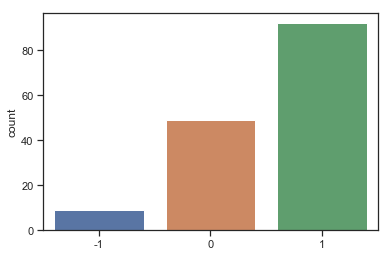

In [86]:
# DBSCAN http://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html
# tidak membutuhkan input parameter k!!!... sangat diperlukan untuk text Mining ... atau clustering data yang besar
dbscan = cluster.DBSCAN(eps=0.6, min_samples=5, metric='euclidean')
dbscan.fit(X)

C_db = dbscan.labels_.astype(np.int)
plot = sns.countplot(C_db)
C_db[:10]
# apa makna cluster label -1?

In [87]:
sum([1 for i in C_db if i==-1])

9

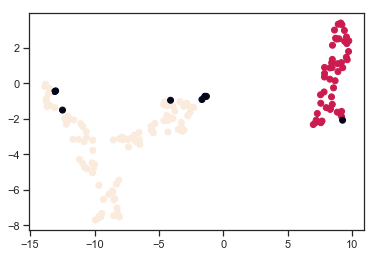

In [88]:
fig, ax = plt.subplots()
plot = ax.scatter(X2D[:,0], X2D[:,1], c=C_db)

https://scikit-learn.org/stable/modules/clustering.html

<p><img alt="" src="images/5_clustering_benchmarks.png" style="height:500px; width:962px" /></p>


<p><img alt="" src="images/5_Cluster_yg_mana.png" style="height:400px; width:694px" /></p>


<h2 id="Computational-Complexity-Challenge-of-Clustering">Computational Complexity Challenge of Clustering</h2>

<p><img alt="" src="images/clustering_efficiency.png" /></p>


# Latihan Analisa Customer pada data "Mall_Customers.csv"

* Ada kecenderungan customer terbentuk menjadi berapa kelompok?
* Rekomendasi apa yang akan disampaikan ke pemilik Mall dari hasil analisa clustering diatas?

# Analysis Regresi

<p><img alt="" src="images/RegressionModels.jpg" /></p>

## Outline Regresi:

* Pengantar ke Predictive Modelling
* Korelasi
* Regresi
* Evaluasi dan Interpretasi Model Regresi
* Regresi Logistik
* Evaluasi dan Interpretasi Model Klasifikasi

# Pendahuluan Model Regresi

* Digunakan saat variabel tak bebas (**Dependent variable** - Y) bertipe **numerik** (float/real) dan variabel bebasnya bisa numerik dan-atau kategorik

<p><img alt="" src="images/Supervised_Methods.png" /></p>


<p><img alt="" src="images/models_wrong_some_useful.png" /></p>

* Perfect/true-best model tidak ada, bahkan seringnya tidak diperlukan

# Beberapa contoh aplikasi regresi

1. **Predictive** Analytics: Memprediksi resiko, harga, penjualan, demand, dsb.

2. Operation Efficiency: Optimasi proses bisnis dengan melihat **hubungan antar variabel** dan mengambil policy berdasarkan hubungan tersebut.

3. Supporting Decisions: **Testing hypothesis**, misal terkait keuangan, operations dan customer purchases.

4. New **Insights**: Regresi dapat membantu menganalisa hubungan antar variabel dan sekaligus mem-filternya.

Sumber: https://www.newgenapps.com/blog/business-applications-uses-regression-analysis-advantages

# Regresi dan Korelasi

<p><img alt="" src="images/correlation_2.png" /></p>

# Regresi dan Korelasi

* Konsep dasar Persamaan/model Regressi adalah hubungan linear antara variabel bebas dan tak bebas.
* Sehingga kita akan awali bahasannya dengan Korelasi

<p><img alt="" src="images/correlation.png" /></p>


# Koefisien Korelasi Pearson

* Korelasi adalah suatu pengukuran untuk melihat **hubungan linier** antara dua variable numerik. Disimbolkan dengan **r**, untuk sampel, dan **$\rho$** untuk populasi.

* Langkah pertama dalam penentuan korelasi adalah dengan membuat **diagram pencar** (scatter plot) dari variabel terkait. Pada korelasi, kedua variable setara, dalam artian tidak ada yang menjadi variable bebas dan terikat. 

* Namun, untuk mempermudah pembahasan, pada diagram pencar, satu variable akan disimbolkan sebagai *x* (variable bebas) dan satu variable sebagai *y* (variable terikat/tak bebas). Jika titik – titik data terkonsentrasi di sekitar garis lurus, maka merupakan indikasi bahwa korelasi antara kedua variable tinggi. Makin terpencar data dari suatu garis lurus, menunjukkan makin rendah korelasi antara kedua variable tersebut.

# Nilai koefisien korelasi Pearson

* Nilai dari koefisien korelasi Pearson adalah dari -1 hingga +1.

<p><img alt="" src="images/korelasi_pearson_01.png" /></p>

<p><img alt="" src="images/linear-nonlinear-relationships.png" style="width: 688px; height: 266px;" /></p>

# Hati-hati

* Koefisien korelasi = 0 bukan berarti tidak ada hubungan antara kedua variable. Yang benar adalah: tidak ada hubungan LINIER, tapi bisa jadi ada hubungan dalam bentuk lain; misal: kuadratik, atau fungsi lain selain linier, seperti pada contoh di atas. 

# Memahami Korelasi dari perumusannya (Statistical Thinking)

* Korelasi sebenarnya adalah Covariance dibagi dengan masing-masing standar deviasinya.
* Apa maksud/maknanya?

<p><img alt="" src="images/korelasi_pearson_formulae.png" /></p>

# Contoh sederhana

<p><img alt="" src="img/data_korelasi_01.png" /></p>

In [89]:
# ToyData Example
x = np.array([40, 45, 53, 60, 65, 71]) # Usia
y = np.array([126, 124, 135, 142, 139, 151]) # Tekanan Darah
np.corrcoef(x, y)
# Hasilnya adalah matriks korelasi

array([[1.        , 0.94676931],
       [0.94676931, 1.        ]])

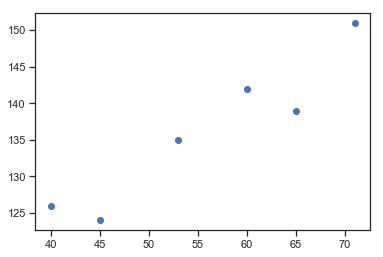

In [90]:
# Plot untuk melihat datanya
plt.scatter(x, y)
plt.show()

                   usia  Tekanan_Darah
usia           1.000000       0.946769
Tekanan_Darah  0.946769       1.000000


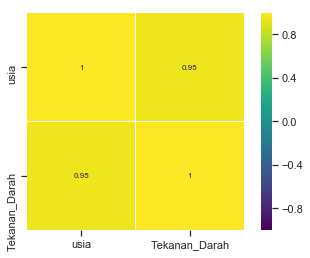

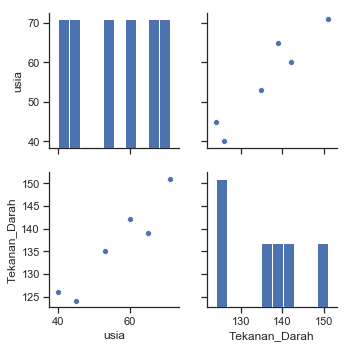

In [91]:
# cara lain dengan DataFrame
df = pd.DataFrame({'usia':x, 'Tekanan_Darah':y})
print(df.corr())
sns.heatmap(df.corr(),cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,annot=True, annot_kws={"size": 8}, square=True)
p = sns.pairplot(df)

# Interpretasi

* Nilai ~0.95 menunjukkan bahwa ada korelasi linier positif yang kuat antara usia dan tekanan darah. Ada kecenderungan bahwa usia tinggi berkaitan dengan tekanan darah yang kebih tinggi dibandingkan usia rendah.
* **WARNING**
* **Korelasi tidak sama (meng-implikasikan) dengan sebab akibat**. Perhatikan interpretasi di atas. Tidak dinyatakan bahwa jika usia tinggi maka tekanan darah rendah, hanya suatu tren atau kecenderungan. Mungkin saja usia dengan bertambahnya usia maka tekanan darah meningkat, tapi mungkin juga tekanan darah tinggi bukan karena usia, tapi faktor lain yang tidak teramati pada data.

* Contoh lain penelitian di Machine learning (kecantikan dan confidence/Panjang Jari dan IQ)

# Batasan nilai $R^2$ seperti ini? ... Really? Why? Why not?

<p><img alt="" src="images/Corr_interpretation.png" /></p>
[image Source: https://spencermath.weebly.com/home/interpreting-the-correlation-coefficient]

* Cases (social, medicine, etc)
* Objective, prediction vs insights.

# Regresi Linier Sederhana


<img alt="" src="images/Reg_sederhana_01.png"/>

<p><img alt="" src="images/reg_eq.png" style="width: 599px; height: 249px;" /></p>

<p><img alt="" src="images/reg_types.png" /></p>

[image source: https://www.slideshare.net/mahakvijay3/basics-of-regression-analysis]

<p><img alt="" src="images/Regression_FlowChart.jpg" /></p>

[image Source: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html]

# Korelasi ke Regresi

<p><img alt="" src="images/korelasi_2_regresi.png" /></p>

# Diskusi

* Mengapa Error diasumsikan berdistribusi normal?
* Error VS Residual?
* Di dunia nyata kita seringnya tidak mengetahui error. Loh kok? Maksudnya?
* Apa beda regresi dan interpolasi di Metode Numerik?

# Bahas sebentar pentingnya memahami "Loss Function"

* Persamaan/Model Linier adalah dasar terpenting di Statistika, Data Science, Machine Learning, dan Deep Learning (*).
* Banyak model di (*) sebenarnya adalah fungsi linier, bahkan di masalah klasifikasi.
* Yang membedakan adalah "pemodelan/optimasi masalah/Loss Functionnya"

-- Keterangan lebih lanjut ... 

# Heteroskedasticity

<p><img alt="" src="img/heterokedastisitas.png" /></p>


# Regresi memprediksi rata-rata $y_i$ untuk $x_i$, maksudnya?

<h1 id="Asumsi-Klasik">Asumsi Klasik</h1>

* https://tau-data.id/asumsi-statistika-benci-butuh/
<p><img alt="" src="images/asumsi_reg.png" style="width: 800px; height: 298px;" /></p>

<p><img alt="" src="images/asumsi_reg_2.png" /></p>


# Some warnings in Regression

<p><img alt="" src="images/Warnings_on_Regresi.png" /></p>

# Multikolinearitas: Mengapa dan seberapa "robust"?

## Kapan kita tidak perlu hawatir tentang hal ini?

# Pembahasan tentang Scaling

# Pembahasan tentang Interpolasi dan bukan Ekstrapolasi 

## Kalau mau ekstrapolasi bagaimana?

# Bagaimana jika error tidak berdistribusi "normal"?

# Evaluasi Error (Mean Squared Error)

<p><img alt="" src="images/mse_regresi.png" /></p>

* Hati-hati,... perhatikan rumusnya dengan baik .... ia tidak robust terhadap outlier
* $\hat{y} = \beta_0 + \beta_1 x_1 + ... + \beta_n x_n$
* MSE = total jarak/selisih antara prediksi dan nilai dari data (sesungguhnya)
* RMSE = $\sqrt{MSE}$   ... why? 
* Evaluasi penting ketika kita ingin melakukan prediksi

# Evaluasi $R^2$: Model VS Tidak Pakai Model?

<p><img alt="" src="images/R_Square.png" /></p>

# Adjusted R-Squared? Why?

<p><img alt="" src="images/Adjusted_R_Squared.png" /></p>

# Pengaruh Variabel Tak Bebas ke Model


<p><img alt="" src="images/sig_var_di_Regresi.png" /></p>

* $SSR = SST - SSE = \sum{(y_i-\bar{y})^2} - \sum{(y_i-\hat{y_i})^2}$  

# p-value (bergantung distribusi; contoh kasus distribusi normal)?

<p><img alt="" src="images/p-value.png" /></p>

* Probabilitas membuat kesalahan
* Dari rumus di cell sebelumnya, ada "masalah" dengan formulasi p-value.

# Menangani Data Kategorik di Regresi

1. Numeric Encoding
2. Dummy variable encoding
3. One-Hot Encoding

In [92]:
# Contoh Data

dt = [['female', 'New York', 'low', 4], ['female', 'London', 'medium', 3], ['male', 'New Delhi', 'high', 2]]
col = ['Gender', 'City', 'Temperature', 'Rating']

In [93]:
data = pd.DataFrame(dt,columns=col)
print(data)

   Gender       City Temperature  Rating
0  female   New York         low       4
1  female     London      medium       3
2    male  New Delhi        high       2


# Numeric encoding

* Lebih cocok untuk ordinal (terutama jika kategorinya cukup banyak)

In [94]:
data['City_encoded'] = LabelEncoder().fit_transform(data['City'])
data.head()
# Hati-hati tidak ada urutan encodingnya, cocok untuk variabel nominal

,Gender,City,Temperature,Rating,City_encoded
0,female,New York,low,4,2
1,female,London,medium,3,0
2,male,New Delhi,high,2,1


# Customized Ordinal Numeric Encoding

In [95]:
mapping = {'low':0, 'medium':1, 'high':2}
data['Temperature_encoded'] = data['Temperature'].map(mapping)
data.head()

,Gender,City,Temperature,Rating,City_encoded,Temperature_encoded
0,female,New York,low,4,2,0
1,female,London,medium,3,0,1
2,male,New Delhi,high,2,1,2


# One-hot encoding

* Preferable in Machine learning community
* Variabel nominal

In [96]:
Oh = pd.get_dummies(data['City'], prefix='City')
Oh
# Perhatikan, sekarang setiap kategori di variabel kategorik menjadi sebuah variabel baru
# tapi bagaimana memasukan hasil encoding ini kembali ke datanya?

,City_London,City_New Delhi,City_New York
0,0,0,1
1,1,0,0
2,0,1,0


In [97]:
dt = pd.concat([data, Oh], axis=1)
dt.head()

,Gender,City,Temperature,Rating,City_encoded,Temperature_encoded,City_London,City_New Delhi,City_New York
0,female,New York,low,4,2,0,0,0,1
1,female,London,medium,3,0,1,1,0,0
2,male,New Delhi,high,2,1,2,0,1,0


# Dummy Variable (Statisticians)

* less parameter
* konsepnya seperti "binary system"
* Statistician tidak suka jika jumlah parameter berlebih
* default encoding beberapa modul

In [98]:
dum = pd.get_dummies(data['City'], prefix='City', drop_first=True)
dum.head()

,City_New Delhi,City_New York
0,0,1
1,0,0
2,1,0


In [ ]:
pd.concat([data, dum], axis=1)

# Regresi Non-Linier?

## Why?
## Kapan tidak disarankan menambah kompleksitas model?
## Regression for insights VS regression for prediction.

## Masih linear terhadap parameter

<p><img alt="" src="images/linearisasi_regresi.png" /></p>
[image source: https://sites.google.com/site/apphysics1online/appendices/2-data-analysis/graph-linearization ]

# Pentingnya "scaling" di Regresi (atau clustering) untuk mencari insight dari data

<p><img alt="" src="images/scaling.png" /></p>

<p><img alt="" src="images/standardize.png" /></p>
<p><img alt="" src="images/minmax.png" /></p>

[image source: https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e ]

In [99]:
# Contoh
# Load DataFile CSV
try:
    df = pd.read_csv('data/iklan.csv') # run locally
except:
    !wget -P data/ https://raw.githubusercontent.com/taufikedys/umi/master/data/iklan.csv
    df = pd.read_csv('data/iklan.csv') 
df.head()

,No,Iklan,Laba,Tipe
0,1,10,9.17,1
1,2,1,1.32,0
2,3,12,8.54,1
3,4,12,7.68,1
4,5,5,7.15,1


In [100]:
df.drop("No", axis=1, inplace=True)
df.head()

,Iklan,Laba,Tipe
0,10,9.17,1
1,1,1.32,0
2,12,8.54,1
3,12,7.68,1
4,5,7.15,1


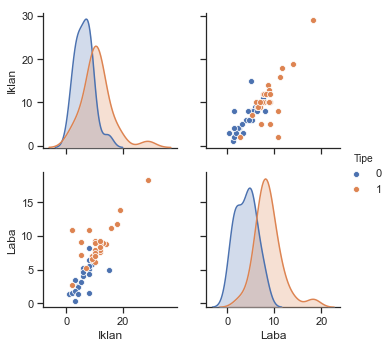

In [101]:
p = sns.pairplot(df, hue = 'Tipe', vars=['Iklan', 'Laba'])

In [102]:
standardize = preprocessing.StandardScaler()
minMax = preprocessing.MinMaxScaler()

In [104]:
st = minMax.fit_transform(df[['Iklan', 'Laba']]) # Harus numerik dan Tidak Boleh ada Null/missing values
st # hasilnya Numpy Array

array([[0.32142857, 0.49221357],
       [0.        , 0.05561735],
       [0.39285714, 0.45717464],
       [0.39285714, 0.40934372],
       [0.14285714, 0.37986652],
       [0.10714286, 0.12347052],
       [0.25      , 0.58565072],
       [0.10714286, 0.11512792],
       [0.25      , 0.06562848],
       [0.25      , 0.26751947],
       [0.14285714, 0.48720801],
       [0.46428571, 0.46996663],
       [0.03571429, 0.58565072],
       [0.03571429, 0.0650723 ],
       [0.39285714, 0.42269188],
       [0.28571429, 0.30867631],
       [0.42857143, 0.4810901 ],
       [0.28571429, 0.37541713],
       [0.07142857, 0.        ],
       [0.07142857, 0.08453838],
       [0.39285714, 0.4810901 ],
       [0.28571429, 0.33704116],
       [0.32142857, 0.41991101],
       [0.25      , 0.28865406],
       [0.17857143, 0.20856507],
       [0.32142857, 0.47886541],
       [0.5       , 0.26084538],
       [0.14285714, 0.15517241],
       [0.07142857, 0.17185762],
       [0.17857143, 0.256396  ],
       [0.

In [105]:
# Jika ingin dimasukkan lagi ke Dataframe awal
st_df = pd.DataFrame(st, columns=['Iklan', 'Laba']) # Merubah Numpy Array menjadi DataFrame
df2 = pd.concat([df, st_df], axis=1) # caranya sama dengan saat kita mendiskusikan encoding variabel kategorik
df2.head()

,Iklan,Laba,Tipe,Iklan,Laba
0,10,9.17,1,0.321429,0.492214
1,1,1.32,0,0.000000,0.055617
2,12,8.54,1,0.392857,0.457175
3,12,7.68,1,0.392857,0.409344
4,5,7.15,1,0.142857,0.379867


In [106]:
# Similary untuk minMax
mm = minMax.fit_transform(df[['Iklan', 'Laba']])
mm_df = pd.DataFrame(mm, columns=['iklan_mm', 'laba_mm']) # Merubah Numpy Array menjadi DataFrame
df3 = pd.concat([df, mm_df], axis=1) # caranya sama dengan saat kita mendiskusikan encoding variabel kategorik
df3.head()

,Iklan,Laba,Tipe,iklan_mm,laba_mm
0,10,9.17,1,0.321429,0.492214
1,1,1.32,0,0.000000,0.055617
2,12,8.54,1,0.392857,0.457175
3,12,7.68,1,0.392857,0.409344
4,5,7.15,1,0.142857,0.379867


# Contoh Regresi di Python (Data Pengeluaran Biaya Iklan)

In [107]:
# Fitting model Regresi Sederhana
x = df[['Iklan']]
y = df[['Laba']]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [108]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [109]:
# Modelnya
print(regressor.intercept_)
print(regressor.coef_)

[1.38132085]
[[0.56955442]]


In [110]:
# Hasil prediksi
y_pred = regressor.predict(X_test)
y_pred[:5]

array([[3.08998411],
       [9.35508273],
       [4.22909295],
       [4.79864737],
       [8.21597389]])

In [111]:
print('R^2:', regressor.score(X_train, y_train))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R^2: 0.565692630250068
Mean Absolute Error: 1.1846550032814063
Mean Squared Error: 3.482921570248186
Root Mean Squared Error: 1.8662587093562848


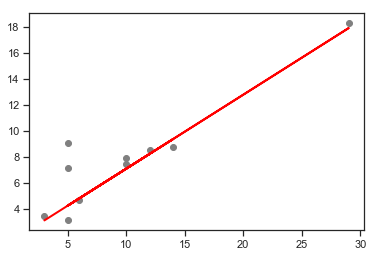

In [112]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

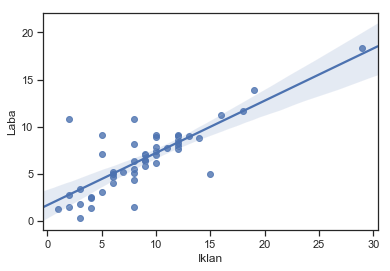

In [113]:
# Menggunakan Module "SeaBorn" jauh lebih mudah ketimbang MatplotLib
df = pd.read_csv('data/iklan.csv') 
p = sns.regplot(df.Iklan, df.Laba)

# <center><font color="blue"> End of Module 05

<hr />
<p><img alt="" src="images/meme_04_regression.png" /></p>